In [1]:
%load_ext autoreload
%autoreload 2

In [33]:
from src.clasterization import clasterize
from src.fetch_comments import fetch_comments
from src.embed import embed
from src.embed import model_names as embed_model_names
from src.sampling import sample_from_claster as sample

In [48]:
comments = fetch_comments(id='L_Guz73e6fw', max_result=3000, max_len=200)

In [52]:
embed_model_names

['SentenceTransformer/bert-base-nli-mean-tokens']

In [53]:
embeddings = embed(model_name=embed_model_names[0], sentences=comments)

embeddings.shape

(3001, 768)

In [67]:
from collections import Counter

clasters = clasterize(method_name='kmeans', embeddings=embeddings, n_clusters=5, n_init=10)

counts = Counter(clasters)

# print 

claster_inds = {claster for claster in clasters}

for claster, count in counts.items():
    print(f'Claster {claster} has {count} comments')

Claster 2 has 711 comments
Claster 0 has 942 comments
Claster 1 has 496 comments
Claster 4 has 390 comments
Claster 3 has 462 comments


In [70]:
# sample comments from claster

for ind in claster_inds:
    print(f'Claster {ind}')
    inds = clasters == ind
    comments_claster = [comment for comment, ind in zip(comments, inds) if ind]
    embeddings_claster = embeddings[inds]

    samples = sample(embeddings_claster, comments_claster, n_samples=5)

    for comment in samples:
        print(comment)
        print('-' * 10)
        pass

    print("=" * 100)

Claster 0
Is this why ELON feeling need get the hell off Planet Earth!! He warns Against AI- YOU a need education On Batteries !!
----------
"Do you worry that power will corrupt you"
"Yes"
Lex Friedman is probably the best man for the job of educating the world on AGI, by far
----------
Lots of populism and brand glorification

What the author calls the future will not come soon
I saw the source code and everything is very bad there

These guys took very powerful computers as a gift 
----------
First thing you learn about machine learning is biased. Suddenly the algorithm can not be taught to be unbiassed. Seems like a load of BS.
----------
I love gpt4 but it is very clearly and by design biased in favor of left ideology.   It's not even trying to pretend to be impartial.   I think that ultimately it will be It's downfall as other AI ang
----------
Claster 1
Sam has grown so much since his days at y-combinator. This conversation was refreshing and insightful. I'm glad he's the one he

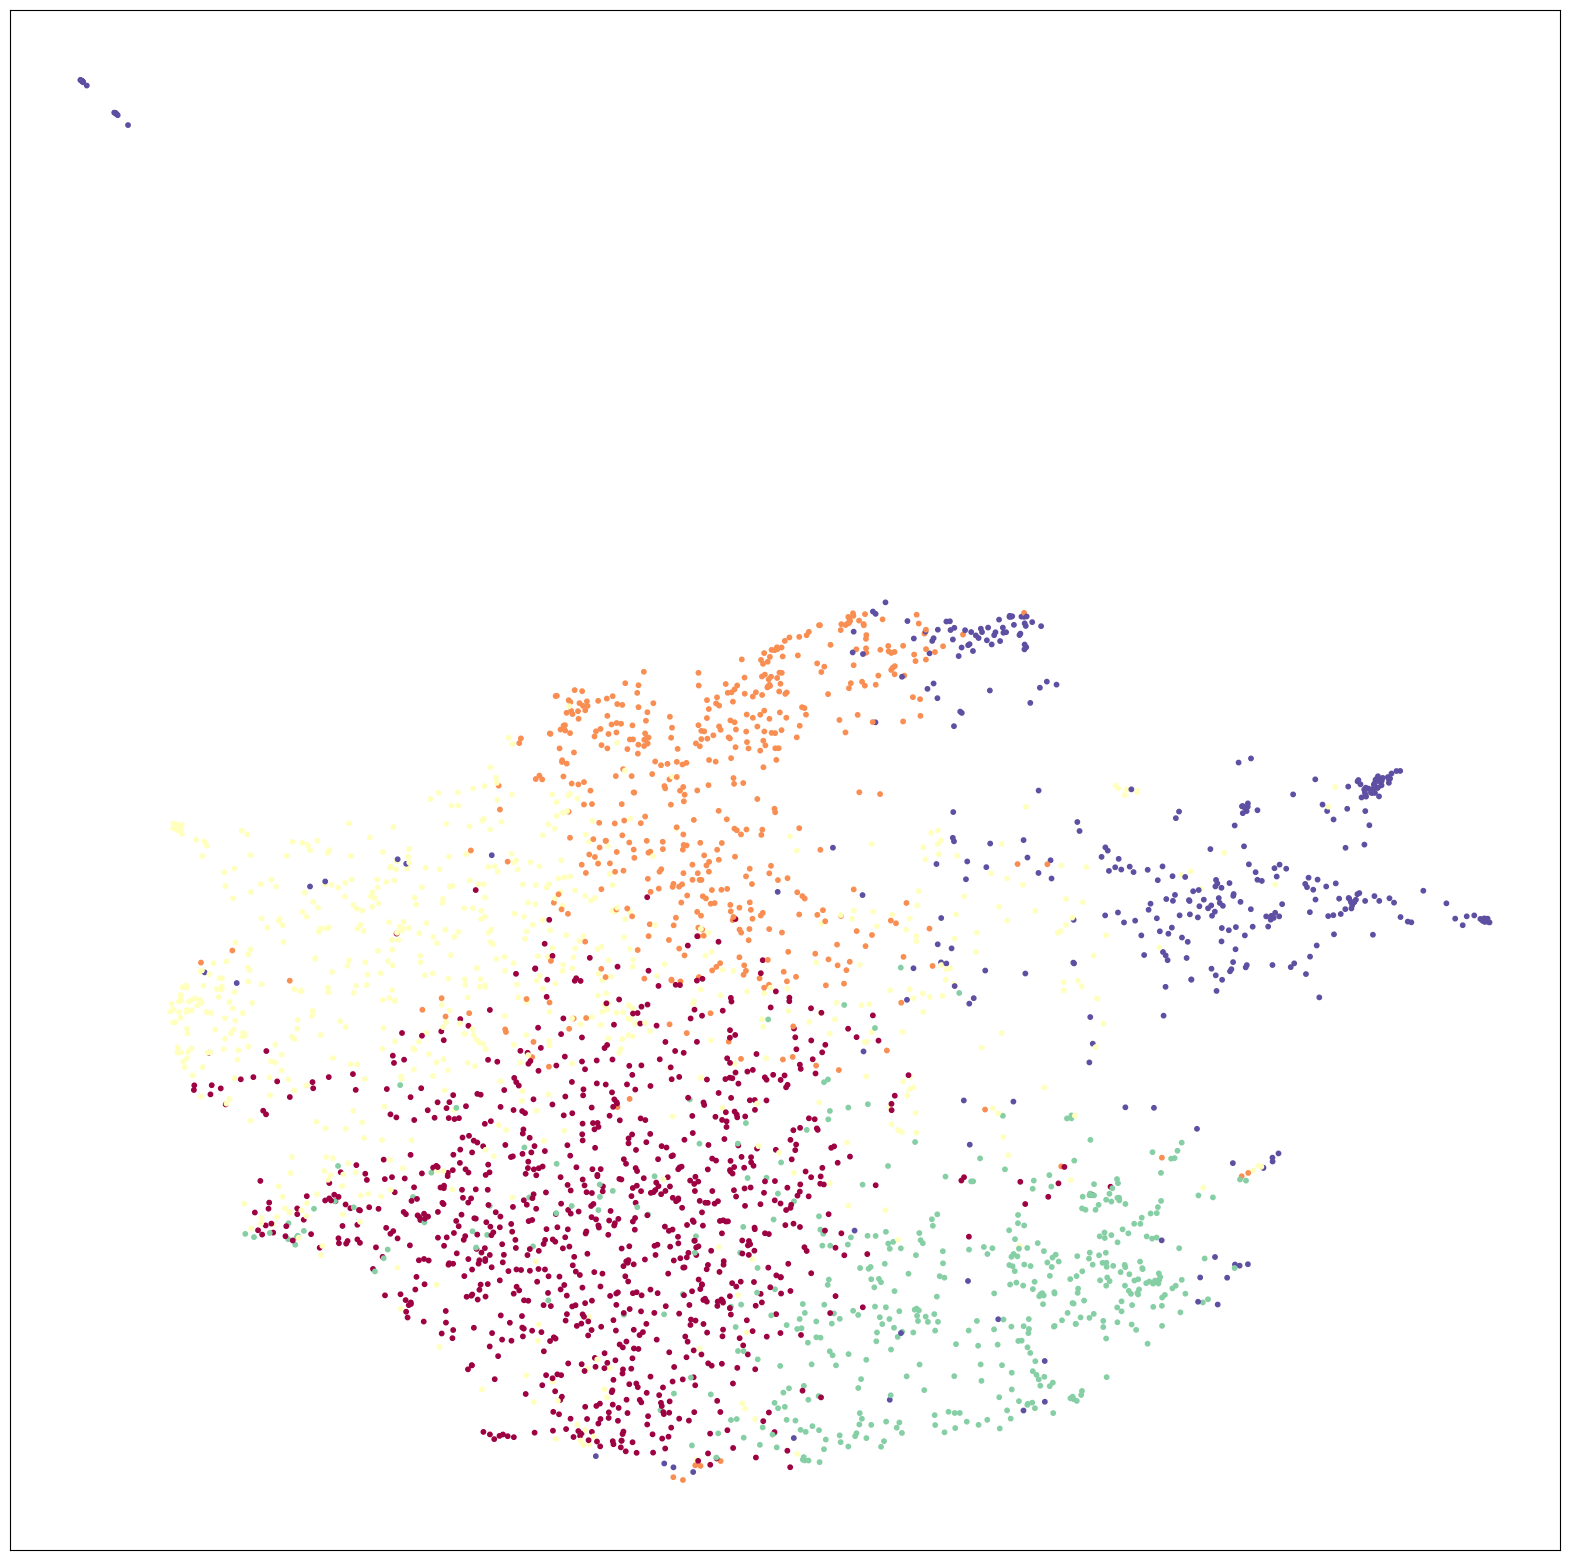

In [71]:
# UMAP visualization
import umap

umap_embeddings = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine').fit_transform(embeddings)

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=clasters, s=10, cmap='Spectral')
plt.xticks([])
plt.yticks([])
plt.show()